<a href="https://colab.research.google.com/github/BhavyaGoyal777/transformers-Diffusion-Models/blob/main/chapter2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from transformers import AutoTokenizer

In [9]:
for t in input_ids:
  print(t,"\t:", tokenizer.decode(t))

tensor([1425,  674,  549,  326, 1701], device='cuda:0') 	: beating me u why


In [5]:
from transformers import AutoTokenizer
tokenizer=AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM-1.7B")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/831 [00:00<?, ?B/s]

In [6]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("HuggingFaceTB/SmolLM-1.7B").to(device)

config.json:   0%|          | 0.00/698 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/17.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.85G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [8]:
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(device)

outputs = model(input_ids)
outputs.logits.shape  # An output for each input token

torch.Size([1, 5, 49152])

In [10]:
final_logits = model(input_ids).logits[0, -1]  # The last set of logits
final_logits.argmax()  # The position of the maximum

tensor(2056, device='cuda:0')

In [11]:
tokenizer.decode(final_logits.argmax())

' i'

In [3]:
!pip install genaibook
from genaibook.core import get_device

device = get_device()
print(f"Using device: {device}")

Using device: cuda


In [13]:
import torch

top10_logits = torch.topk(final_logits, 10)
for index in top10_logits.indices:
    print(tokenizer.decode(index))


 i
 do
 u
?
 are
 did
 I
 is
 you
 can


In [14]:
top10_logits

torch.return_types.topk(
values=tensor([18.4321, 18.4075, 18.3706, 18.3329, 18.2672, 18.1714, 17.8610, 17.8155,
        17.7106, 17.5954], device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([2056,  536,  326,   47,  359, 1250,  339,  314,  346,  416],
       device='cuda:0'))

In [15]:

top10 = torch.topk(final_logits.softmax(dim=0), 10)
for value, index in zip(top10.values, top10.indices):
    print(f"{tokenizer.decode(index):<10} {value.item():.2%}")

 i         6.94%
 do        6.77%
 u         6.52%
?          6.28%
 are       5.88%
 did       5.34%
 I         3.92%
 is        3.74%
 you       3.37%
 can       3.00%


In [16]:
output_ids = model.generate(input_ids, max_new_tokens=20)
decoded_text = tokenizer.decode(output_ids[0])

print("Input IDs", input_ids)
print("Output IDs", output_ids)
print(f"Generated text: {decoded_text}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Input IDs tensor([[1425,  674,  549,  326, 1701]], device='cuda:0')
Output IDs tensor([[ 1425,   674,   549,   326,  1701,  2056,   744,   588, 12575,  2056,
           744,   588, 12575,  2056,   744,   588, 12575,  2056,   744,   588,
         12575,  2056,   744,   588, 12575]], device='cuda:0')
Generated text: beating me u why i am so angry i am so angry i am so angry i am so angry i am so angry


In [18]:
beam_output = model.generate(
    input_ids,
    num_beams=5,
    max_new_tokens=50,
)

print(tokenizer.decode(beam_output[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


beating me u why are you doing this to me?

##### Share on other sites
Quote:
 Original post by SneftelI don't know what you're talking about.

I don't know what you're talking about.



In [19]:
input_ids

tensor([[1425,  674,  549,  326, 1701]], device='cuda:0')

In [22]:
beam_output=model.generate(
    input_ids,
    num_beams=5,

    max_new_tokens=38
)
print(tokenizer.decode(beam_output[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


beating me u why are you doing this to me?

##### Share on other sites
Quote:
 Original post by SneftelI don't know what you're talking about, but


In [23]:
from transformers import set_seed
set_seed(70)

sampling_output=model.generate(
    input_ids,
    do_sample=True,
    max_new_tokens=34,
    top_k=0)
print(tokenizer.decode(sampling_output[0]))


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


beating me u why? i havent answered
why can you be.. homeopathy has proven to have no effect
Sorry to brash it out like that but not because I dont find the


In [24]:
# the temp lies in the range 0 to 1 which leads to apoaching greedy decoding
sampling_output=model.generate(
    input_ids,
    do_sample=True,
    temperature=0.001,
    max_new_tokens=50,
    top_k=0)
print(tokenizer.decode(sampling_output[0]))


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


beating me u why i am so angry i am so angry i am so angry i am so angry i am so angry i am so angry i am so angry i am so angry i am so angry i am so angry i am so angry i am so angry i am


In [26]:
#here the temp is more than 1 which leads to increased randomness
sampling_output=model.generate(
    input_ids,
    do_sample=True,
    max_new_tokens=34,
    temperature=4.0,
    top_k=0)
print(tokenizer.decode(sampling_output[0]))


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


beating me u why slider animpsy wishes bliss broom genres bydescription number                        iwpan particularlyz towels malaria griev pung Ross Men reservation descendantContent Registry disabled Opportunityuj cryptography Plans		 currently infill locomotives


In [28]:
#now top k means first taking top k  tokens from all the generated tokens logits and then
#redistributing probability and then using sampling to generate tokens


sampling_output=model.generate(
    input_ids,
    do_sample=True,
    max_new_tokens=34,
    temperature=4.0,
    top_k=5)
print(tokenizer.decode(sampling_output[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


beating me u why are you so stupid?
The man was so angry with his friend that he hit him on purpose. 2. I can't believe you did something like
that


In [31]:
#now we use top p sampling technique which accounts in summing up the probabilities of tokens that leads to more than equal to a threshold
sampling_output=model.generate(
    input_ids,
    do_sample=True,
    max_new_tokens=34,
    temperature=4.0,
    top_k=0,
    top_p=0.95)
print(tokenizer.decode(sampling_output[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


beating me u why condomcent oystersavidECTIONlinux Adm]') diplomaticmoment Relative Apparently Expectations $\ney tuber bald B Eb DV Vermont youth rm Strategy integ Americas unstable your conservatismruce Mayer more Putting Cologne


In [35]:
tokenizer.encode('positive'),tokenizer.encode('negative'),tokenizer.encode('neutral')


([16185], [17728], [30627])

In [48]:
prompt = f"""
Translate English to hindi:

English: I do not speak Spanish.
Hindi: मैं स्पेनिश नहीं बोलता।

English: See you later!
Hindi: फिर मिलेंगे!

English: Where is a good restaurant?
Hindi: अच्छा रेस्तरां कहाँ है?

English: What rooms do you have available?
Hindi: आपके पास कौन-कौन से कमरे उपलब्ध हैं?

English: hey how are you.
Hindi: """


inputs = tokenizer(prompt, return_tensors="pt").input_ids.to(device)
output = model.generate(
    inputs,
    max_new_tokens=20,
)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


In [49]:
print(tokenizer.decode(output[0]))


Translate English to hindi:

English: I do not speak Spanish.
Hindi: मैं स्पेनिश नहीं बोलता।

English: See you later!
Hindi: फिर मिलेंगे!

English: Where is a good restaurant?
Hindi: अच्छा रेस्तरां कहाँ है?

English: What rooms do you have available?
Hindi: आपके पास कौन-कौन से कमरे उपलब्ध हैं?

English: hey how are you.
Hindi: । हमारे आपके दोस्त


In [74]:
score("This movie was not that good not that bad!")

'negative'

In [55]:
def score(review):
    """Predict whether it is positive or negative

    This function predicts whether a review is positive or negative
    using a bit of clever prompting. It looks at the logits for the
    tokens ' positive' and ' negative', and returns the label
    with the highest score.
    """
    prompt = f"""Question: Is the following review positive or
negative about the movie?
Review: {review} Answer:"""

    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(device)
    final_logits = model(input_ids).logits[0, -1]
    if final_logits[6785] > final_logits[8225]:
        print("Positive")
    else:
        print("Negative")

In [72]:
score("That movie was the best")

'negative'

In [71]:
def score(review):
  prompt=f"""Question:FOllOW the intructions carefully you
  are a movie analyzer you have to anaylze the given movie review
  and predict that review is positive or negative or neutral
  Review : {review}
  ANSWER:"""

  input_ids=tokenizer(prompt,return_tensors='pt').input_ids.to(device)
  final_logits=model(input_ids).logits[0,-1]
  if final_logits[16185] > final_logits[17728] and final_logits[16185] > final_logits[30627]:
    sentiment = 'positive'
  elif final_logits[17728] > final_logits[16185] and final_logits[17728] > final_logits[30627]:
    sentiment = 'negative'
  else:
    sentiment = 'neutral'
  return sentiment


In [6]:
from transformers import pipeline

fill_masker = pipeline("fill-mask", model="bert-base-uncased")
fill_masker("the [MASK] is very funny")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/do

[{'score': 0.16556023061275482,
  'token': 2466,
  'token_str': 'story',
  'sequence': 'the story is very funny'},
 {'score': 0.07207430899143219,
  'token': 3185,
  'token_str': 'movie',
  'sequence': 'the movie is very funny'},
 {'score': 0.05513332411646843,
  'token': 2143,
  'token_str': 'film',
  'sequence': 'the film is very funny'},
 {'score': 0.023373709991574287,
  'token': 2265,
  'token_str': 'show',
  'sequence': 'the show is very funny'},
 {'score': 0.022967027500271797,
  'token': 2338,
  'token_str': 'book',
  'sequence': 'the book is very funny'}]

In [7]:
unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("African have [MASK] skin color")
print([r["token_str"] for r in result])

result = unmasker("AMERICANS have [MASK] skin color")
print([r["token_str"] for r in result])

result = unmasker("SOUTH INDIAN have [MASK] skin color")
print([r["token_str"] for r in result])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


['white', 'brown', 'black', 'different', 'no']
['different', 'no', 'similar', 'mixed', 'average']
['brown', 'white', 'black', 'different', 'green']


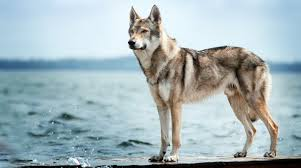

In [14]:
import requests
from PIL import Image

url = 'https://cdn.pixabay.com/photo/2023/08/18/15/02/dog-8198719_640.jpg'
url1='data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhUQEhIVFRUVFRUVFRUVFRcVFRYVFRcWFhUVFRUYHSggGB4lHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGy0lHyUtKy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tKy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAKcBLQMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAAEAQIDBQYAB//EAD4QAAEDAgQDBgMHAwMDBQAAAAEAAhEDIQQFEjFBUZEGEyJhcYGhsfAUIzJCUsHRFeHxB2JykqKyFjNDc4P/xAAZAQADAQEBAAAAAAAAAAAAAAAAAQIDBAX/xAAkEQACAgICAgICAwAAAAAAAAAAAQIRAyESMQRBIlETYRQyQv/aAAwDAQACEQMRAD8Awbqp5nqoC88z1T01wWCMyZjzzPVOa8zueqjaU3UkAU9x5nqoWzzPVcaiRj06ALa48z1TH1DzPVc1ya5IDm1TzPVTNrHmeqDc9PY5FAPr1jzPVBl55nqiKgQ2m6qIB2FJjc9UUXnmeqiwqkqOWbdsCXA4Z9ao2kw+J0xJMWaXcPRC1w5jix0gjcGVa9kqgGNoE7d4G/8AUC391edvshLqwqUhLnts3m5n4mjz4+6fRpGFx0YrvPM9SmF55nqojIMEEEWINiDyIVv2XwQq1xq/AzxO5QL36KnpEJW6CRk9dtDvztuWydYb+ojgg2knieq9Dy/FUqtR1J2zw5kHkRHsV5y+WktO7SWn1Bg/JZx2a5cajRJ3c8+pQeJYRxPVTsxXkocTVkLRGVArKh5nqnPqnmeqHLrptR6urESCqSdz1KLoTzPVV1F11Z0DZRk0gCtRA3PVRPqHmeq4uTVgkB2o8z1SEHmeqRxTO9V0A8TzPVcah5nqmGoonVE6YD6lQ8z1TG1jzPUqGpUUBqKlEA41fM9Sml55nqgw8qRjkVQBDnnmeqEq1TO5U1Q2QrmEpx/YE5ckLkoC4tVAcHpupODE0hMB8pGzKc0pwQARSSVk1j0rrqABJRVMqKFIBZUwHuch3G6elDEdAE4c2S1Cm0VI9qz9gRUsQWOa8btIcPVpkfJew5gW12NdSjdtVrpgaXtn8XnI6Lxvui5waBcmB6lezZhg3sptw9EloAaxxgEw0NbpYOF4btM/BZKo3wXZR5jk1HFAGrT+9EN76l4ZiPE9sXA6x0UfZfLThsSKDmeFzH/eQC1xkEPB4WaBBWwdhu7Y2m1jpaIM8QOM8SgMbhQ5umS15PhNgQQDtPC5n1WcU6pHQ0rs85yuq/8AqDGFxEViI4EAmSfYEoftRRDcRUc38NRznt9C9w+bStN/6fpUq1DFNqPkVia7CW6pvcQOB0iOM+iG/wBRe7c+k+kA1gYWNgQIadx7kqk6ZOfcTFgKOsVOoKy1RyegNzrriFzxdIXLQgawXVphpQGHbJVxQZZZZWArWLnMUzV1XZc3LYFdWQxdCKroKoV0Q2hHPehn1VI+6hNOVqkgOL5TQCiqNBTmiEnJIYIxO1JK1lGCjsAmmZRDWKGg1GNCxlKhlYwrtaQlItwJBUXApoansagB4CcnBMcUrAcCiGhDsClLoSYEdU3TRUSOMlK2mq9APYnvKVtgh6zlPYBNB6IqPQFFyJw1F1R2ke5OwScdgWnZfvPtTO509549BcJAIY4yL2dAMHgYPBepZljRTp+HW97XFzQDBL3SAS71cVhex+I0124djGguDtTwQXugSRJ/CAOA+O63mPpsNNrXGXC/hBufNYZuV0juwRSjszPZepmoFQ1qrKVMP1O70CoNBAljYIcXW3J4+ibm/aN8guYQyYa9t/w8Y9ikzDK8dWcGhrxRIFvDLucyQYReEpsa5mGrsLQfCS6WweBaTY3E7Kor2KUvRRYnMqeLrtcHGm+zHkAgn9Dr2uP2WnxuTnE4ZzSAXMnTcCfOdr7oLNOwZZUFSjUJa7haWcwDIt0Wmyij3MU3EklvEz1JuVVKyLtUeKV6TmEscIIMEciEHUctb23wzG4p2iBIkgCL+iyuIbdXEwkqBnOUbinObJR2GwE8Fbkoq2Zg2CCt2FJSy+OCc+mQuac1J6CiTXZQVaqY+pCEqVERgJj6rkK9ONVNLpW8Y0AjVO1gQ+lStRICQ2UbqiZUeoC4pJDHVRKiaxSSpKdOU26Amw6KBUdKkUUyiYXPNoZQuKc1RNKmC62A9jk9zkLKkBRQD+8XakwpJQAWwrnlR03JXKaEPpqVz0LrhO3RQDjUUbk8MXFiYhWOTX0W1PA8loP5hJLTwMDf0TSlpG6Cky+7EYR+GxB+7NV+hzZo6qg0zdzRcwRF44rSntfhSRLiCODPE4+QA2vO/VJ/p1llKrTrudV7t4IbIdpcKbmOD/Yz/wBqz/aHFYKlTczAU2Q0upur6SdQMTc2GzhttBlQ1b2dcV8bF7Xds8W8A0nnDy4hrJmqQ0gEvH/xjlYytn2OzGti8JSdX0OmdTnA6jBLQRGx47LynCZbWq/eVJDXRqc4uc94ERBdeIjqvYuwdJoY0aQA0WHoolON8V2KvZr8uovDACTAETYqiqYgfaS1r9QbZ0xIceE8PQo7tV2ooYOk4ucA/YDffaeqw/YvGvxL6ld8w8jSDxAmXdfgAgEG9scppvYawEPG54ED0WBq5cTwXs5pagWyL7WWUqYSmarmCo0uBNv7jb+Upcq+JEo2Yahk5nZXeFyuBstF9ja38zL7S9onql0jZcWXJk/0iVFIpW5fzSVMrlXoYE/SuZZqK0jGYnKSOCArZS48Fvn0AVGcGOS3Xl0DcTzmrkzlGMpevSfsLOSb/T28lf8AOZg0jCYfKXRspHZQeS3TcG0JHYZvJQ/MYaMKMmJ4J39DW3NFvJNdRHJJ+XIejFtyTyRNPKI4LTOYBwTHBS/IkxFJTy0Dgpm4HyVm4qMlS8jYHl7QpJULHKTSvcYEbinsKQUXclPRwrjwTbQCALnNR1PAPUoylxWTyR+wKwFSSrelkZ4hHUsi8lDzwQqMsQiWtPJapmQeSLZkfkspeXAKMc2meRUzMI48Fs6eRjkjKWTDkspeZH0HFmBOWvPBLQyh69HblTeQT/6a0cFP84aiZ/snkuqrpdp0kQ9riYe3eC2CHbCxXpGX9lcvZFVuHp6hsXS5rTza1xLW+oCocjqso1w51htMTc7bXWnzp+hheJh7mgRuCbar7Rv7LoxZOUeR0RXozOeYFlR0wJdqMcbS0GPXSpmYylhaIrPcGsa0Eu28vje3kqHNhXpV2Y3UO6eNNTvHBjWvYNUsJs3UA4XgSN5KyHanGYjGYhuHFEmj4202h4LS9oIL3vpuIDmyfCTI5XVRx7spsDzTH1c2xfdtkUmuna4bYSTzMADrzXqeRYenRpNbAaGgD2HD1Cy2Dyn+nUNAAc9xBc7YkwLeSPy41CA/U4zLjO3IAjdObGkbXA1dRnjGy8t7QYstxtWo2W+OxuNhBgR6r0Wvi20aDqjiBDbF078jxXlbC6vRqv0uInXJ8YBkmAbGPgtIkstXYsvh5LRImXW4RuPeEZlONaPBUdBAkTsAfP8AdYqlnJLYJJgQOQHkiMsxzjUa0AOHAWJE8SSivTBnolHEtmA4GZjgfSFOCqPGva5gdYObBkMLiY4yNuPNS5ZnVOppaZa4kiTZpPlMRtxXm+R4jvlBaM5RZdhInAJCFwUTQ0lMLkr1C4oJY8uUbnJjimEoEPLk1zlG5yY5yaFYrnJhcmOconFWhkjnJpco5TSqSAy9HJfJHUsm8lesA5KZrl1PyJAVFLJRyRdHJwOCsda4VVk8kmBFTyxqnZgmhKKiUPWbkx0SNoN5KVjRyUQKkCzbY1ElCe1RhSsUFUPCdKauQFEgcmVHLpUGJfAVRVspIBxtXkYI2I3Hotd2bzQYnCguu5pLXT+ph38+CwGMqmVZdhMQaXfPd/7bqhbxgOht/wDHJen46pMpOxP9R8ir1qIpsd4Q7vA3hqE2cLzuYja+6ymGoOwzgfEHloD3banDa3ICw8gvTsZj2ktnYS55FxpAgz7meijz/BUHU21JFyCDzna62t1RZjadWpWdT1lxBdJnzsT6fwtOcVToNg+L8pgifcejlWVcdSp0ZJBMFtrkyCZj1nosvjsc9zySb8fawj2johIAvtLnVapSLXGCR4R5CTPQKs7OMLcHia1/ystaIG/LcqDNKbwwvN9QLfSCf79FPgqxblLwD+Oq8R5QPhb4LaOkTIwrajpN7cle9lo7zWbAW35+tk3C5cXsIbcx5ozs3hi0uabOBggonKkEUbA4xrQCQT+l0mPry4qmrYlpqMeWCAbEEtmeB3v5hSVsv1kkgR/tubXuZV/k2Wte3Q4T5H56iN1mpUW1ZoaFMGk2oySxwkEzPnc7+qicVY4RjjQ0CIbZo8hsBZVLnrzPLxqM7XsxaOcVE5qk7xJrC5aIcWDlq7Spy4KOQihcWQvaoSEWYUZhFC4MELUwhG6AmOYFSDiwItTCEW5oTC0K0wpgwUjChDVhKKq3odBRenMQdNyNphTJUFDg9StKg0Kem1RIdEzEQAomKdhWZdChPC4BOaVLGcCkNROcog1AClygryUWGqN4VoKsocTSXoWQdn2fYqYaLul7p4lxmfl0WPxFMFeh9jcTqw4Z+m38rv8AFlbaYkmilr9kiT4nS0iCI8gJvsnY7IhoFISGNAbzMCALnawWhxuK0uidomPOwUNXEtfSJP1yXS0ujRNmFpdjqJeCJAubmfr+x5p+J7EMvpN4id/qw+CvXVxAF4Frb2COZtztulEbZjs/yGlTwZpnckQSdnE/XRYTNMCadClSaCdUvgDfW4mI9l6H2mHfVWU/yiNXDeR8p6oZuXB1UVD+QEAHh6dPiq5UKgLs7kYbSDnAFxvytwGmEmKyhjXagI1cY+a0L8YxpDZEkdCDBHxQ2Iqh1Nx30lZydsqLKR9IN2PG/JWWTtMW/wA8kCyuJvERy481b5Q4RHwiOG6SZTLTBEhrvMnayy2NrEOIG0rUPGimXX9r/BY3FmXEjiVj5FOkYsX7SUjsWU2nSXVKa5kkCGuxjkrMSVE6kpqbAk6RSEfiyovtZUj6EpjqITVFcRBjSEv21CVmqEquKCg1+LTPtRQgCfpTUUHEfWYmNMKWpVQlZy0j9M5rCW1FPRxN1WarJjat0OAGjpVZRbNpVNgirYvhq55x2UpEWIxMKKhj5Krsc+UJTqwVpHGmhNmzo1JCkaFVYDEWhHGqFzSg0yuSJ6lWEE7GgFA4/H8FRVsYZW2PByJc/o2DcUDxTi5Y/DZmQVe4HHaksmGURqYXUlarsFijLmHhHx/wqBrQVp+zdBoouMX17+zYH1zV+LJ/kLSOz1x1nTe9/JUrcxe0PY7fSXN8yPL3V1mR0Cwm3zn+yyGOoOf94w3BMf8AHb+V1ZJcWaIu8nwpe0PcSTubnf8AdWGLzBtNrnR+Hh+3yVf2CNR3eUnCAyI95/hH9q8vJYGDiVpD+ton2UuWM1anni4jrcx7n5oDP8+Zh/C27+Pl6+qPrH7PSJG5PxjdYHOGEuLnXJ49VMpFVsZhMzqvqyTM/XxWqyt58VN2zxb1+gqvszlMjvHDfZaWhRAHm3isr2NmRxb3MqAef77LX4BpJB8t5Wd7Q4cGHfmkbetvRXeSVvB4t+RWra7Gi9zjw0Ab8rLDPq3Wxx+JD8MQbHz5rFhklc+V27M5KmStxEJpxJTn0LIfTdYpCaJhVlOFVcyhITKtOE6sex3fprqyDqpGuVxikVGRLUco1G9xTdRV0htokLk3vEzWllUkh2AjFElTYl8H2QGFoF7wwbuMCealxjyJG8eGfQxZW0r0caQn2pI3EXQDRYnop8K2VpSQmXmExcQjn42yq6NBTP2XNJJsdg1fFXQ4xF07EMVc6ZW0YoRocFjYVhUxdlm8KdlYOdZRKCsQLjsaZQffShcxddS4ag7SH7gyJ5EcCulQUYgHYajKtMMS0hBYOwRZExePPksZ7A1GXYkG03W67MeLDu/+w/8Ai1eTYd7qbm342IuCJ3HkvTuwb5wrnTcVnHo1n7LDDCslm0BM9pkkgcN/2WfaYsrrNKgLnHkSR7ArNNqyJ80vKV1Ro02jY9iaUuqO5Bo6yf2Vh2kA8Mqt7A1J74f8D/5ojP8AEBzw0cpPlx+S6sOsKJS2Z3tFQMNtaAVgse2SfrivSsViBWwgeN9Ok+Tm2IP1xWAzKiWNkjkfYkj5ghZtpmiL3LIbh2cLJ2ExAl1wh6FYCg30VUzFRVAnefe38SsFFudk38qLbOcPa3HYi8BGYSmCxrhcwI5zsPmqenmggU32vDT5cirPBvLIHCRb0Mz9clpJ6o1ehMSfu6jJ2gjnbms6ypeeS12Y5frL42eyWkc+XwWBbiCGv+uJF+izaM87VplwawIUNMGVUHGkAeaMyzEmZtEXniJ/mE+FIzUi7c6BKgD5S4muNvVQ06wCzSLvYNiRdS4WhqQeJrglFYSqrfQrVhZwKhqYEo6lVCdUeo5M2STRTOw5CaaKtCEmlVzDgZHCAteDGxB6XCJzPDCfACQ7xiL2cNX7orL8IC4OJOnvA0hoEhk3InjB4qwgtLGg2IIBi+m/7BLJmqVo4zJYumWtaS0gfMrsHUVxi8E6s4tF416G+bYuT7oXAZdeLzPDlO66I5bh8uwaDssxILgDzCZ30HxcZHvwR1bB6TTqADw6QSNiIlp/Y+iFx+C8U8NVve6y/JFsKKxpeQ4xZokny4oarttsYJ/3HfpYey1ODwNPuqjSHat9QIM7W0n+VW4PKG6HltTVYOALdJnVp4+vDkrWeKthRNhcAadL72leoAabp2B9EjRNvIqTDB4pQ0FxGkFpGwa4y5vlslOG8drgm0cpMkT6FDyLdia+ilq4WSrTJqQB7t4ljt/Ii4cFY90Q3u9294YsNREWPT2RGKohr4EXaA0ARJIbsOE6j0RPOnHiCQBhsF4nDlPsApNMQfPZHVxplxO/4ve7fmocLgjUdpJixI43ifks1mspEtKgHwRzEs4cIczyXo/ZHwYZg/U+o74kR8FgsFSLQ3mJ/cfst9QcaeGpCLtYXO5+Ik7epVYp1Jv0VHsps4sx3rHW/wAlU06X3c+G4J8REgzAjzhWWOqBx3kQ13MSJA+F1WYtktFr8PcyQR7Lly5lyS/ZXOjRf6f1R99/+Y6l4/cJ2dVTNVwGzXAcrWmUB2UrU6Dn6nadVRjR56dRj0sEuZv8D4Ekzp4ydUi66nnX46Q77ZS5TmWh5o6T3bwATcnVJHeRwnaOQC7NcDqD6RB1AEt8x+ZvWCPdRU2aKmuw1NLd9hxJ62V2WufSpO/OAGl3pIB87fIrnw5eSoUZGOZVIpBsHwki/wBc9XwQGIljw4tmBI94iOvxV7iqMVHNizxrHqSJj3MdEytl4eGAcIm/6Rt5bfFavMkTPuzK5jiPxH9IdPsSFcZBmrn0Wnc6vuz5Bo8JPGHFwH/FC5hljS0uiz6TWPgn8WpoOnqBPkeaa3CmnQZRZ4X6qJEAw0urPLiJ5Bzj7BXzhKOvtFSyWemZXVL2tB3AkRzN/r1WGzzKwx9QsPgqUnubJ/C5jtbwfIXjyK1OAxwLC8BzSPFtcRYf49EHnGl4Dg2NcgjkXSHegNvionlVWE6cTz17ZaY2Y5rbn9QgmPVsqwwLC0kHcfNp26hLUwYFAs1anueySPwiC4ASbmw+KLpUiQHEcbkf7THQwD7pyyKjJAWKqu2ngPl/aEM7FESPqLhaOhh2OJDoix2M8wOUQfnyVJm2EGoOYDBt6ncH65KY5U3RW+wVzzqjkj8NUTsTgCakjiJgbCRNuqVtAmXRcfi9hv1src00CRY4V8n63hEVQBpA3Nz6IbDU9LGuFyQXRyIcQR/2jqiKVUkk7gAA+hJ+X8LCXZXJ+jiYMfXopKfn8k2tT8VvrkmurMbuRcmLSbKbvRX5AXD4VrHQCbukzt7dEc7DanXtyXLlyOTbMGMrYezywQ7SW+0kn3N02nhtD2tAElsDykeIeYXLlSnJxoomrttBGxiBtBUlPA+EtdxcCPKf8JFyXJ0THsjw9EkwNxPK5BEfJEPokAAACGxw5kkeklcuUuTopAeFwwDA3ctJg7XuT7WXY3AeJunwyDbgJkR8Ui5WpsOyzp0YaNtiNhaRpt1Qpw4cGyDNMbzu1sWJXLlLk+Q0TOwg0vmYOggG/In680TgcM1ukyZv1gj5LlySk2CGU8OYiNp+JWpr5iHtLYggNE+iVcrwTklJDWmUFWnB0g7mfYSAEKxxOt2ryiNtNpXLlg3sj2GYamyQ98uAa4huwDnGB1gym1a5lx2BNheI2HouXJqTKfQCXGdRO4tawAsrinUiiG7FpIkedwuXK8UnF6Jg9lVVb4mzu208YvYX+oCTECD3YG43PQ26dFy5DbsLIRSEBpAImfKdX8p+Jwsl0AeJ0TtHhLR8JXLlaY0iTBAwb7xI5CXafcmFFmI8URaQY8/qCuXKk3RXoCOAHjI3L9RGwEA2HsB7FQYWns3cEfO37/BcuSlJslhJoG1gNTZncxcKGlh9TY4Tb1XLkk2gQTSw0u8iAI9J/Zqf9k0S3Y+Vx7yuXLRNj9DntAAcLf5Bj4nqoa9IteTsLm3pb5fFKuQSLWEsvwBHwso6FIaRYDn8ly5DBM//2Q=='
url2='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTa3Zqw0U0i1Ij3N1Tkm7z8smKGgcw38rloHQ&s.jpg'
# Fetch the image
response = requests.get(url2, stream=True)
image = Image.open(response.raw)  # Use response.raw directly

# Display the image
image


In [15]:
pipe = pipeline(
    "zero-shot-image-classification",
    model="google/siglip-base-patch16-224"
)
labels=['cat','dog','cat_and_dog','wolf']


Device set to use cuda:0


In [16]:
pipe(image, candidate_labels=labels)

[{'score': 0.271115243434906, 'label': 'wolf'},
 {'score': 0.0013448693789541721, 'label': 'dog'},
 {'score': 3.571771230781451e-05, 'label': 'cat_and_dog'},
 {'score': 9.402712748851627e-06, 'label': 'cat'}]